## Word Cloud

In [107]:
all_text = df['transcript'].str.cat(sep=', ')

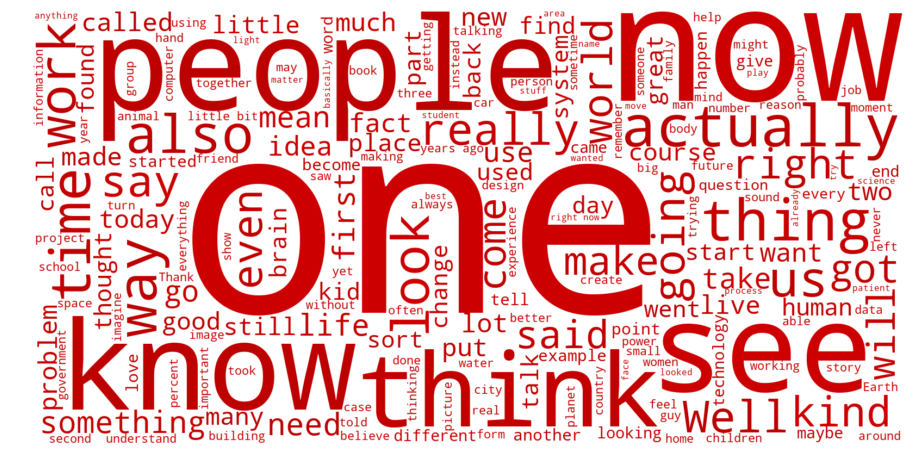

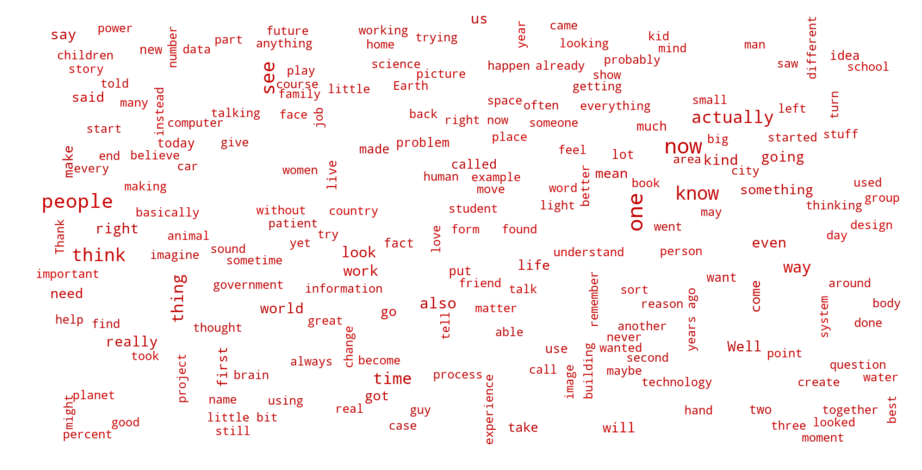

In [118]:
from wordcloud import WordCloud, STOPWORDS
# Read the whole text.
text = all_text

stopwords = set(STOPWORDS)
stopwords.add("ë_")

# Generate a word cloud image

wordcloud = WordCloud(width=1600, height=800, background_color='white',stopwords=stopwords).generate(text)

#change the value in return to set the single color need, in hsl format.
def red_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%%, %d%%)" % np.random.randint(37,41))

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(16,8))
wordcloud.recolor(color_func = red_color_func)
plt.imshow(wordcloud, interpolation='bilinear')
#change the color setting
plt.axis("off")
plt.savefig("Most Common Words in TED Talks")

# lower max_font_size
wordcloud = WordCloud(width=1600, height=800,background_color='white',stopwords=stopwords, max_font_size=40).generate(text)
plt.figure(figsize=(16,8))
wordcloud.recolor(color_func = red_color_func)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## NMF Topic Clustering

In [22]:
import os
import settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from sklearn.decomposition import NMF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
def read_data():
    df = pd.read_excel(os.path.join(settings.PROCESSED_DIR, "all_with_liwc_segmented.xls"), encoding="ISO-8859-1")
    return df

In [121]:
df = read_data()

In [122]:
content = df['transcript'].as_matrix()

In [123]:
import Stemmer
english_stemmer = Stemmer.Stemmer('en')
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: english_stemmer.stemWords(analyzer(doc))

In [124]:
#vect = TfidfVectorizer(max_features=7000, stop_words='english')
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)

In [125]:
column_names = np.array(vect.get_feature_names())

In [136]:
def words_and_topics(h, words):
    top10 = np.flip(h.argsort(axis = 1), axis=1)[:, :10]
    topics_list= []
    for topic in top10:
        print(words[topic])
        topics_list.append(words[topic])

In [137]:
model = NMF(n_components=10, max_iter = 100)
model.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=100,
  n_components=10, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [138]:
w_sk = model.transform(X)
h_sk= model.components_

In [139]:
words_and_topics(h_sk, column_names)

['know' 'peopl' 'like' 'said' 'thing' 'just' 'say' 'think' 'go' 'don']
['planet' 'water' 'earth' 'ocean' 'fish' 'mar' 'speci' 'year' 'sea' 'ice']
['peopl' 'countri' 'govern' 'world' 'africa' 'percent' 'global' 'compani'
 'year' 'dollar']
['cancer' 'cell' 'patient' 'drug' 'diseas' 'tumor' 'health' 'doctor'
 'blood' 'bodi']
['èâ' 'song' 'music' 'sing' 'video' 'choir' 'oh' 'islam' 'loop' 'ice']
['comput' 'design' 'data' 'use' 'thing' 'actual' 'like' 'technolog'
 'machin' 'realli']
['citi' 'build' 'car' 'design' 'space' 'urban' 'peopl' 'communiti'
 'architectur' 'street']
['women' 'men' 'girl' 'woman' 'children' 'stori' 'mother' 'boy' 'famili'
 'sex']
['robot' 'machin' 'like' 'human' 'leg' 'ai' 'intellig' 'autonom' 'use' 'go']
['brain' 'neuron' 'cell' 'conscious' 'human' 'bodi' 'activ' 'anim' 'disord'
 'mind']


In [131]:
topics_df

,1,2,3,4,5,6,7,8,9,10
0,know,peopl,like,said,thing,just,say,think,go,don
1,planet,water,earth,ocean,fish,mar,speci,year,sea,ice
2,peopl,countri,govern,world,africa,percent,global,compani,year,dollar
3,cancer,cell,patient,drug,diseas,tumor,health,doctor,blood,bodi
4,èâ,song,music,sing,video,choir,oh,islam,loop,ice
5,comput,design,data,use,thing,actual,like,technolog,machin,realli
6,citi,build,car,design,space,urban,peopl,communiti,architectur,street
7,women,men,girl,woman,children,stori,mother,boy,famili,sex
8,robot,machin,like,human,leg,ai,intellig,autonom,use,go
9,brain,neuron,cell,conscious,human,bodi,activ,anim,disord,mind


## See Topic modeling by Moral Label

In [69]:
df[['Harm','Authority', 'Ingroup', 'Purity', 'Fairness']].quantile(.75)

Harm         0.3175
Authority    0.3000
Ingroup      0.4100
Purity       0.1100
Fairness     0.0700
Name: 0.75, dtype: float64

In [140]:
df['Harm_label'] = np.where(df['Harm']>0.3175, 1, 0)
df['Authority_label'] = np.where(df['Authority']>0.30, 1, 0)
df['Ingroup_label'] = np.where(df['Ingroup']>0.41, 1, 0)
df['Purity_label'] = np.where(df['Purity']>0.11, 1, 0)
df['Fairness_label'] = np.where(df['Fairness']>0.07, 1, 0)

In [189]:
content = df['transcript'][df['Harm_label'] == 1].as_matrix()

In [190]:
def words_and_topics(h, words):
    top10 = np.flip(h.argsort(axis = 1), axis=1)[:, :8]
    topics_list= []
    for topic in top10:
        print(words[topic])
        topics_list.append(words[topic])
    topics_df = pd.DataFrame(topics_list)
    return topics_df

In [191]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_


In [192]:
harm_topics_df = words_and_topics(h_sk, column_names)
harm_topics_df.to_csv('topics-harm.csv')

['peopl' 'like' 'know' 'think' 'thing' 'say' 'just' 'said']
['patient' 'health' 'care' 'doctor' 'medic' 'hospit' 'surgeri' 'clinic']
['women' 'girl' 'men' 'sex' 'woman' 'sexual' 'violenc' 'mother']
['peopl' 'govern' 'countri' 'war' 'citi' 'world' 'secur' 'conflict']
['ocean' 'water' 'sea' 'fish' 'coral' 'shark' 'anim' 'whale']
['cell' 'cancer' 'diseas' 'drug' 'stem' 'brain' 'vaccin' 'immun']


In [193]:
content = df['transcript'][df['Ingroup_label'] == 1].as_matrix()

In [194]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_

In [195]:
ingroup_topics_df = words_and_topics(h_sk, column_names)
ingroup_topics_df.to_csv('topics-ingroup.csv')

['peopl' 'like' 'know' 'think' 'said' 'thing' 'just' 'want']
['women' 'girl' 'school' 'men' 'educ' 'famili' 'children' 'father']
['world' 'govern' 'countri' 'china' 'global' 'state' 'democraci' 'polit']
['health' 'patient' 'care' 'doctor' 'children' 'diseas' 'medic' 'percent']
['citi' 'design' 'build' 'communiti' 'peopl' 'space' 'hous' 'urban']
['data' 'like' 'look' 'inform' 'actual' 'realli' 'thing' 'human']


In [196]:
content = df['transcript'][df['Authority_label'] == 1].as_matrix()

In [197]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_

In [198]:
authority_topics_df = words_and_topics(h_sk, column_names)
authority_topics_df.to_csv('topics-authority.csv')

['know' 'said' 'peopl' 'like' 'say' 'think' 'want' 'just']
['women' 'men' 'girl' 'woman' 'sex' 'sexual' 'gender' 'femal']
['peopl' 'govern' 'polit' 'countri' 'world' 'democraci' 'citi' 'global']
['school' 'teacher' 'kid' 'educ' 'student' 'children' 'learn' 'class']
['brain' 'robot' 'design' 'comput' 'thing' 'control' 'use' 'like']
['health' 'africa' 'doctor' 'patient' 'hiv' 'african' 'babi' 'mental']


In [205]:
content = df['transcript'][df['Fairness_label'] == 1].as_matrix()

In [206]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_

In [207]:
fairness_topics_df = words_and_topics(h_sk, column_names)
fairness_topics_df.to_csv('topics-fairness.csv')

['like' 'peopl' 'thing' 'think' 'know' 'just' 'go' 'realli']
['women' 'men' 'girl' 'woman' 'sex' 'boy' 'gender' 'daughter']
['countri' 'peopl' 'percent' 'world' 'compani' 'global' 'dollar' 'year']
['cell' 'brain' 'gene' 'plant' 'human' 'genom' 'fli' 'genet']
['citi' 'design' 'build' 'space' 'new' 'street' 'architectur' 'car']
['peopl' 'muslim' 'democraci' 'polit' 'prison' 'islam' 'war' 'govern']


In [202]:
content = df['transcript'][df['Purity_label'] == 1].as_matrix()

In [203]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_

In [204]:
purity_topics_df = words_and_topics(h_sk, column_names)
purity_topics_df.to_csv('topics-purity.csv')

['peopl' 'like' 'just' 'know' 'think' 'thing' 'say' 'go']
['cancer' 'tumor' 'patient' 'doctor' 'diseas' 'pancreat' 'drug' 'blood']
['water' 'citi' 'world' 'oil' 'use' 'plant' 'energi' 'climat']
['women' 'peopl' 'health' 'countri' 'girl' 'school' 'year' 'children']
['èâ' 'loop' 'islam' 'arab' 'compass' '99' 'song' 'stori']
['cell' 'brain' 'stem' 'diseas' 'drug' 'actual' 'tissu' 'patient']


In [208]:
df['Moral'].quantile(.75)

1.5

In [209]:
df['Moral_label'] = np.where(df['Moral']>1.5, 1, 0)

In [210]:
content = df['transcript'][df['Moral_label'] == 1].as_matrix()

In [211]:
vect = StemmedTfidfVectorizer(min_df=2, stop_words='english', analyzer='word', ngram_range=(1,1))
X = vect.fit_transform(content)
column_names = np.array(vect.get_feature_names())

model = NMF(n_components=6, max_iter = 100)
model.fit(X)
w_sk = model.transform(X)
h_sk= model.components_

In [212]:
moral_topics_df = words_and_topics(h_sk, column_names)
moral_topics_df.to_csv('topics-all.csv')

['peopl' 'think' 'like' 'thing' 'just' 'don' 'know' 'go']
['famili' 'peopl' 'school' 'said' 'children' 'father' 'kid' 'know']
['cell' 'diseas' 'health' 'patient' 'cancer' 'drug' 'doctor' 'brain']
['citi' 'govern' 'countri' 'world' 'global' 'peopl' 'state' 'china']
['women' 'men' 'girl' 'sex' 'woman' 'sexual' 'gender' 'equal']
['compass' 'god' 'religi' 'religion' 'muslim' 'islam' 'èâ' 'peopl']


## Get all words for Tableau

In [98]:
content = df['transcript'].as_matrix()